In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

from sklearn.model_selection import KFold

from nltk.corpus import stopwords
from textblob import TextBlob


from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict



from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import RandomizedSearchCV

Populating the interactive namespace from numpy and matplotlib


# Rating Learning and Prediction for Amazon Product Reviews

## Bahman Roostaei

$\textit{December 2016, Galvanize , San Fransisco.} $

In this project we use the reviews of various products submitted by Amazon.com customers to understand the models that can best predict (classify) the ratings. Understanding the ratings that a given text indicates helps for businesses to ultimately be able to collect the most relevant and most helpful reviews to their products. 

The data are obtained from [here](http://www.cs.jhu.edu/~mdredze/datasets/sentiment/). The data includes about more than a 1000 review text for products like DVD's and Books and Kitchen tools. The data have been mostly cleaned and processed into dictionary of bi-grams. We reprocess the data and convert it to token sets as well and analyze both the tokens and also the original format. 

We first use classification models and calculate the accuracy score and present the confusion matrix. Since this is a multiclass classification we group the ratings that are close to each other (4 and 5) and (1,2). Note that there is no rating 3 option (see below for the histogram of labels). We then use regressor models to be able to analyze the model by ROC curve.

In [2]:
class review_analysis(object):
    
    def __init__(self,product_name,filename):
        # instanciate the class by giving the product name or the filename in which
        # the train and test files are.
        self.product_name = product_name
        self.filename = filename
        
    def read(self):
        
        # read the Amazon processed files.
        
        with open(self.product_name+'/'+self.filename) as f:
            self._data = f.readlines()
    
        
    
    def process(self,pure_token = False):
         
        # if pure_token = True returns a lisr of single strings each containing all the 
        # tokens (no underscores) repeated in the same number as original review 
        # but stop words removed.
        # In all cases it returns the labels as well.
        
        self._pure_token = pure_token
        data = self._data
        X = [] # X is list of dictionaries (or processed reviewes) in the selected product name.
            
        y = [] # y corresponds to the labels.
        
        for rev in data: 
            rev_dict = defaultdict(int)
            for W in rev.split()[:-1:]:
                key= W.split(':')[0]
                value = int(W.split(':')[1]) 
                rev_dict[key] = value
                
            X.append(rev_dict)
            label = rev.split()[-1].split(':')[1]
            y.append(float(label))
    
        if pure_token:
            stop_words = stopwords.words('English')
            review_nostop = []
            for review in X:
                tokens = []
                for key,value in review.items():
                    key_split = key.split('_')
                    for elem in key_split:
                        if elem not in stop_words:
                            for _ in range(value):
                                tokens.append(elem)
                review_nostop.append(' '.join(tokens))
    
            return review_nostop,y
        else:
            return X,y

### Part 1. Data

Data have been provided as dictionary of joined tokens (bag of bi-grams) for each review. Here we reprocess the data and convert them to a document with $\textit{only tokens with stop words removed}$ as reflected in dictionaries with the corresponding number of times it is repeated. 

We start with the book review and their star ratings:

In [3]:
rva = review_analysis('books','train')
rva.read()
X,y = rva.process(pure_token=True)

In [4]:
rva_test = review_analysis('books','test')
rva_test.read()
X_test_original,y_test_original = rva.process(pure_token=True)

Here is a sample of the review generated after processing. This set of tokens are not in the human meaningful order.

In [5]:
X[0]

"field school type shadows law clerk law law law law professionals guy becomes shadows waste professional money law guy become law professional everyone professionals law six-figure-paid professionals lawyer type clerk lawyer right even money law school aren't money even everyone becomes understand book aren't right becomes law field book book guy book book book ridiculous type become become law school lawyer new people everyone want understand law wants professional people give field six-figure-paid lawyer give aren't new understand lawyer lawyer wants ridiculous six-figure-paid clerk give break want shadows break people want even waste right wants ridiculous"

The ratings are balanced:

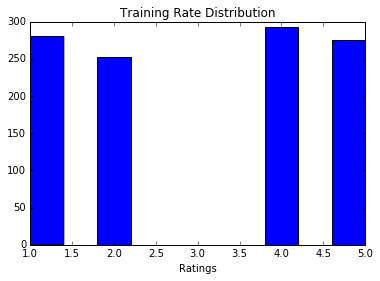

In [6]:
plt.hist(y)
plt.xlabel('Ratings')
plt.title('Training Rate Distribution');

We also can analyze the polarity distribution of the documents and investigate how they are related to the ratings. We use TextBlob:

In [350]:
polarity = []
for i in range(len(y)):
    blob = TextBlob(X[i])
    polarity.append(blob.polarity)

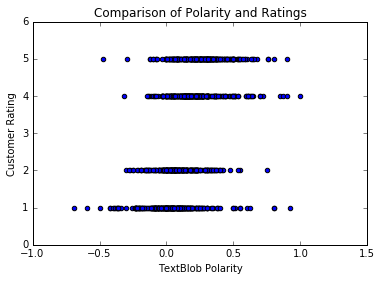

In [351]:
plt.scatter(polarity,y)
plt.xlabel('TextBlob Polarity')
plt.ylabel('Customer Rating')
plt.title('Comparison of Polarity and Ratings');

From the above we observe that the extreme ratings (1,5) cover wider range of polarities.

## vocabulary:

The vocabulary size can be found using the vecorizer:

In [7]:
vectorizer_c = CountVectorizer(min_df=1)
vec_train = vectorizer_c.fit_transform(X)

In [9]:
# vocabulary:
vocab  = vectorizer_c.vocabulary_

In [20]:
# list of all vocabulary with stop words removed.
words = vocab.keys()

In [21]:
# size of vocabulary with stop words removed:
len(words)

15923